## 对数据做EDA
* 数据分析
    * 缺失值分析
    * 特征值分析
    * 是否有单调特征列(单调的特征列很大可能是时间)
    * 特征nunique分布
    * 出现在测试集中的community，但是在训练集中数量较少
    * 统计特征值出现频次大于100的特征
    * Label分布
    * 不同的特征值的样本的label的分布


# 分析
根据给定的数据集，建立模型，预测房屋租金。  
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。  
这是典型的回归预测。  
  
## 1. 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 2. 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　
　　　　


In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

# GBDT
from sklearn.ensemble import GradientBoostingRegressor
# XGBoost
#import xgboost as xgb
# LightGBM
#import lightgbm as lgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#载入数据
tran_file_path = r'./Data/train_data.csv'
test_file_path = r'./Data/test_a.csv'
data_train = pd.read_csv(tran_file_path)
data_train['Type'] = 'Train'
data_test = pd.read_csv(test_file_path)
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)

## 3. 总体情况一览

### 简要分析
该份训练集包含 41440行×52列数据  
目标变量是 真实房租价格- **tradeMoney** 
  
大多数数据都是int或float型；有部分字段是object型，即文本型中文或英文的，如rentType字段，这些字段在之后需要做处理  

# 数据分析
其中文本型的包含：renttype, housetype, housefloor,houseToward, houseDecoration, countryname,communityName,region,plate,buildYear
先观察这几个变量质量，以及处理方式


In [27]:
data_train['rentType'].groupby(data_train['rentType']).count()  #renttype质量不高，可以考虑剔除
data_train['houseType'].groupby(data_train['houseType']).count()  #houseType，可以考虑折算成面积，数值可以反应房屋面积
data_train['houseFloor'].groupby(data_train['houseFloor']).count()  #高中低，可以转成数值型，可以转成onehot，本身数值可以反应趋势，转成数值更好
data_train['houseToward'].groupby(data_train['houseToward']).count()  #房间朝向，转换成one hot
data_train['houseDecoration'].groupby(data_train['houseDecoration']).count()  #装修类型，转换成数值型更好   有29000 未知，质量不高
data_train['communityName'].groupby(data_train['communityName']).count()  #社区名，one hot
data_train['region'].groupby(data_train['region']).count()  #地区名，one hot
data_train['plate'].groupby(data_train['plate']).count()  #类别名，one hot
data_train['buildYear'].groupby(data_train['buildYear']).count()  #建筑年份，转成日期型，有2800未知 质量尚可


buildYear
1910       5
1912       3
1920       5
1926       2
1930      30
        ... 
2014    1238
2015     840
2016     140
2017      14
暂无信息    2808
Name: buildYear, Length: 80, dtype: int64

In [17]:
# 总体情况
print(data_train.info())
print(data_train.describe())
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 52 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,Train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,Train


## 4. 分类特征和连续型特征

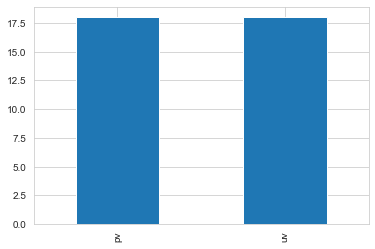

In [29]:
sns.set_style("whitegrid")
missing = data_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
##统计缺失值，数据质量很高，只有uv和pv存在缺失值


In [6]:
# 根据特征含义和特征一览，大致可以判断出数值型和类别型特征如下
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']   

numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']   #数值型

## 5. 缺失值分析

In [7]:
# 缺失值分析
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values(data_train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


### 简要分析
这里采用编写函数的方式来直接获取结果（这种方式会在之后反复用到，建议大家尽早养成函数式编写的习惯）；  
其实在总体情况一览中，info()函数也能看出来。  
  
结果是，仅有pv、uv存在缺失值，后面再探究会发现缺失的都是属于同一个plate，可能是官方直接删除了该plate的pv、uv

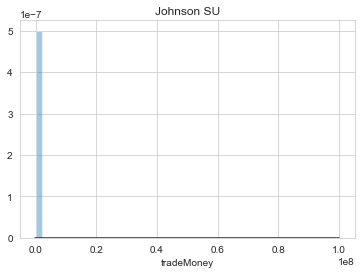

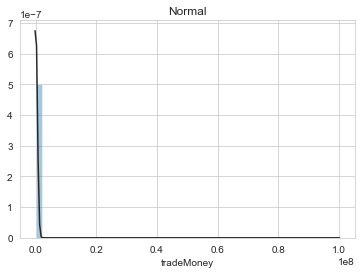

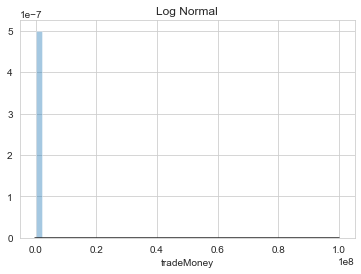

In [31]:
y = data_train['tradeMoney']
import scipy.stats as stats
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

## 6. 单调特征列分析

In [12]:
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    if cnt / data_train.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


### 简要分析
先编写判断单调的函数 *incresing*， 然后再应用到每列上；  
单调特征是 tradeTime，为时间列。  
  
多说句额外的，时间列在特征工程的时候，不同的情况下能有很多的变种形式，比如按年月日分箱，或者按不同的维度在时间上聚合分组，等等  

## 7. 特征nunique分布

rentType的特征分布如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


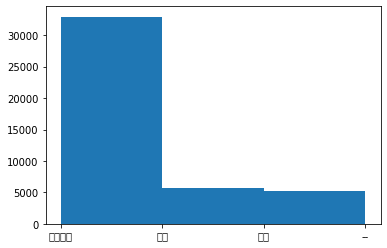

houseType的特征分布如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
          ... 
7室4厅3卫       1
6室1厅4卫       1
5室5厅4卫       1
2室1厅3卫       1
8室3厅4卫       1
Name: houseType, Length: 104, dtype: int64


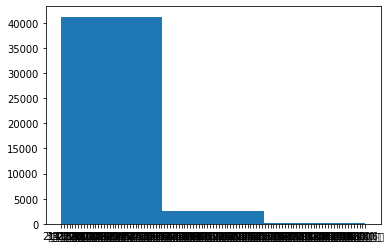

houseFloor的特征分布如下：
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


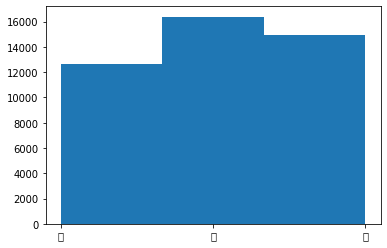

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


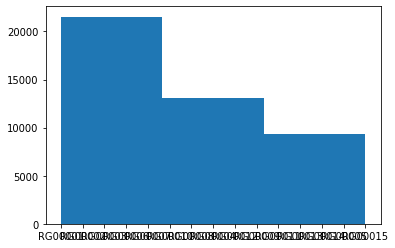

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


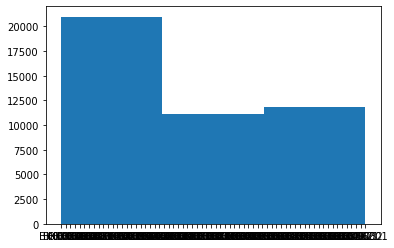

houseToward的特征分布如下：
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


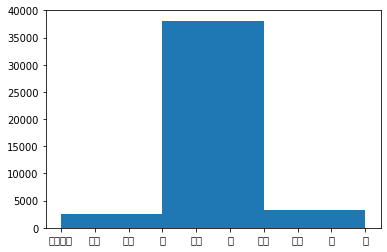

houseDecoration的特征分布如下：
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


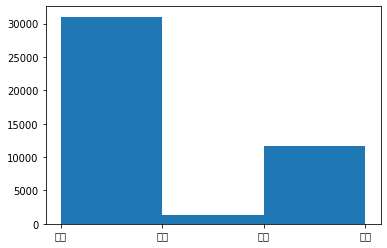

communityName的特征分布如下：
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ01302      1
XQ02870      1
XQ01972      1
XQ02671      1
XQ01787      1
Name: communityName, Length: 4236, dtype: int64
city的特征分布如下：
SH    41440
Name: city, dtype: int64


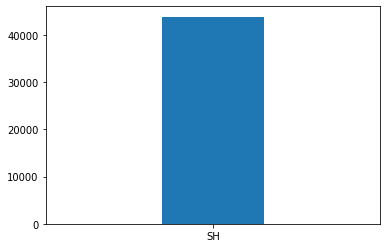

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


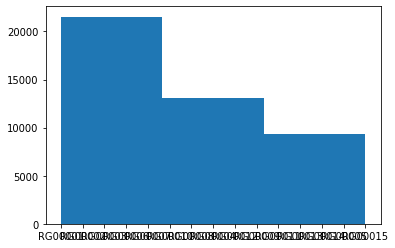

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


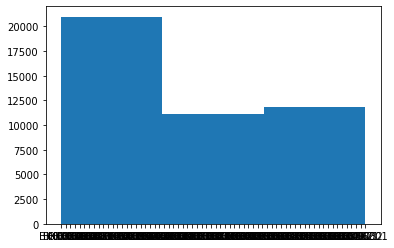

buildYear的特征分布如下：
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
        ... 
1972       2
1961       2
1962       1
1950       1
1951       1
Name: buildYear, Length: 80, dtype: int64


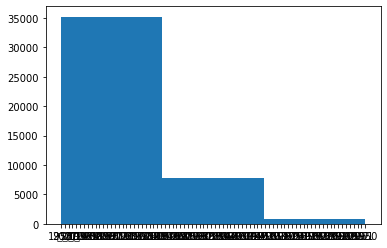

In [13]:
# 特征nunique分布
for feature in categorical_feas:
    print(feature + "的特征分布如下：")
    print(data_train[feature].value_counts())
    if feature != 'communityName': # communityName值太多，暂且不看图表
        plt.hist(data_all[feature], bins=3)
        plt.show()

In [14]:
print(data_train['communityName'].value_counts())
print(data_test['communityName'].value_counts())

XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ01302      1
XQ02870      1
XQ01972      1
XQ02671      1
XQ01787      1
Name: communityName, Length: 4236, dtype: int64
XQ03306    1
XQ00629    1
XQ01830    1
XQ00534    1
XQ02021    1
          ..
XQ03596    1
XQ03784    1
XQ00332    1
XQ01140    1
XQ00239    1
Name: communityName, Length: 2469, dtype: int64


### 简要分析
用自带函数value_counts() 来得到每个分类变量的 种类 分布；  
并且简单画出柱状图。  
  
rentType：4种，且绝大多数是无用的未知方式；  
houseType：104种，绝大多数在3室及以下；  
houseFloor：3种，分布较为均匀；  
region：       15种；  
plate：        66种；  
houseToward：    10种；  
houseDecoration： 4种，一大半是其他；  
buildYear：     80种；  
communityName：   4236种，且分布较为稀疏；  
  
此步骤是为之后数据处理和特征工程做准备，先理解每个字段的含义以及分布，之后需要根据实际含义对分类变量做不同的处理。  

## 8. 统计特征值频次大于100的特征

In [15]:
# 统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
12  RG00011     793
13  RG00009     681
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7 

### 简要分析
此步骤和特征nunique分布结合步骤结合起来看，有一些小于100的是可以直接统一归类为其他的

## 9. Label分布

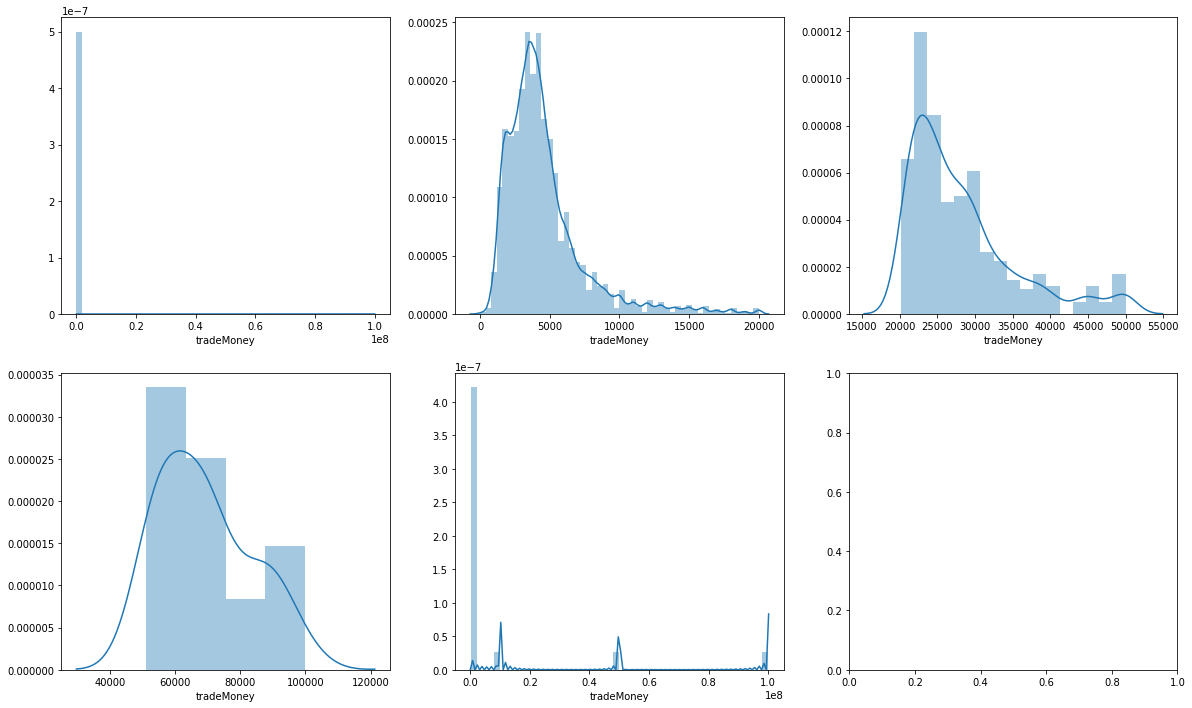

In [18]:
# Labe 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [19]:
print("money<=10000",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


### 简要分析
将目标变量tradeMoney分组，并查看每组间的分布；  
可以看出绝大多数都是集中在10000元以内的，并且从图中可以看到该分布是右偏的。  
  
这里只是一种实现方式，完全可以将tradeMoney和其他字段一起结合起来查看，比如楼层高低，地区板块。  

In [19]:
#对训练数据进行拆分，分为4个部门分析相关性
data_train1 = data_train[['area','rentType','houseType','houseFloor','totalFloor','houseToward','houseDecoration','tradeTime','tradeMoney']]
data_train2 = data_train[['communityName','city','region','plate','buildYear','saleSecHouseNum','tradeMoney']]
data_train3 = data_train[['subwayStationNum','busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum','drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum','tradeMoney']]
data_train4 = data_train[['totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney','totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum','supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice','landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum','tradeMoney']]



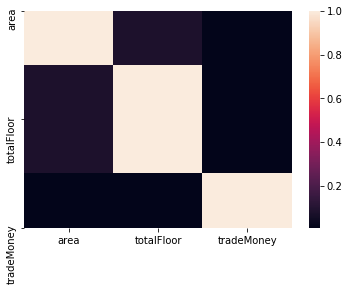

In [20]:
sns.heatmap(data_train1.corr())

#热力图可以看出 这几个指标与价格本身相关性非常低

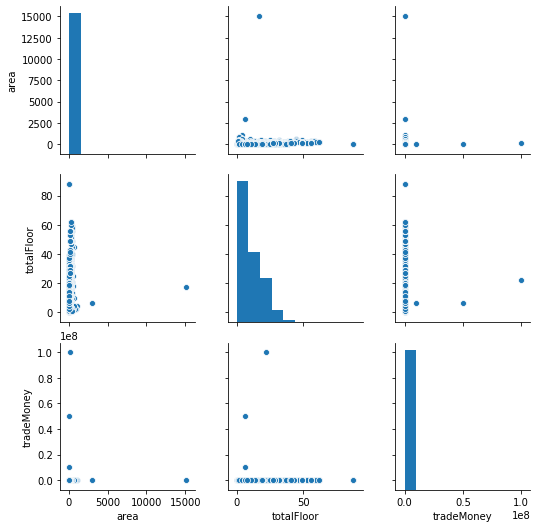

In [21]:
sns.pairplot(data_train1)

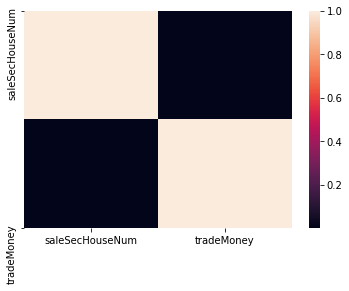

In [22]:
sns.heatmap(data_train2.corr())

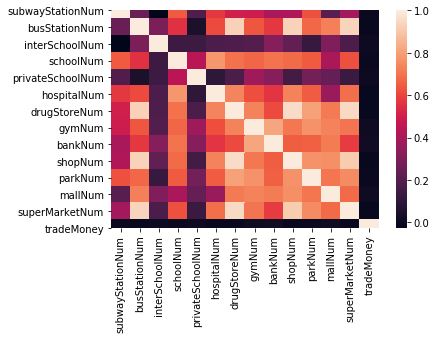

In [23]:
sns.heatmap(data_train3.corr())
#从热力图可以看出这几个指标与trademoney相关性都很低

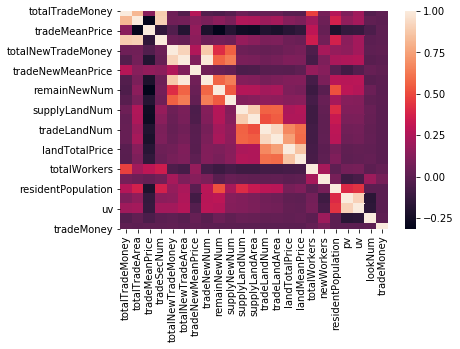

In [24]:
sns.heatmap(data_train4.corr())
#从这几个指标可以看出大部分指标与价格相关性不大，只有newWorkers稍大一点

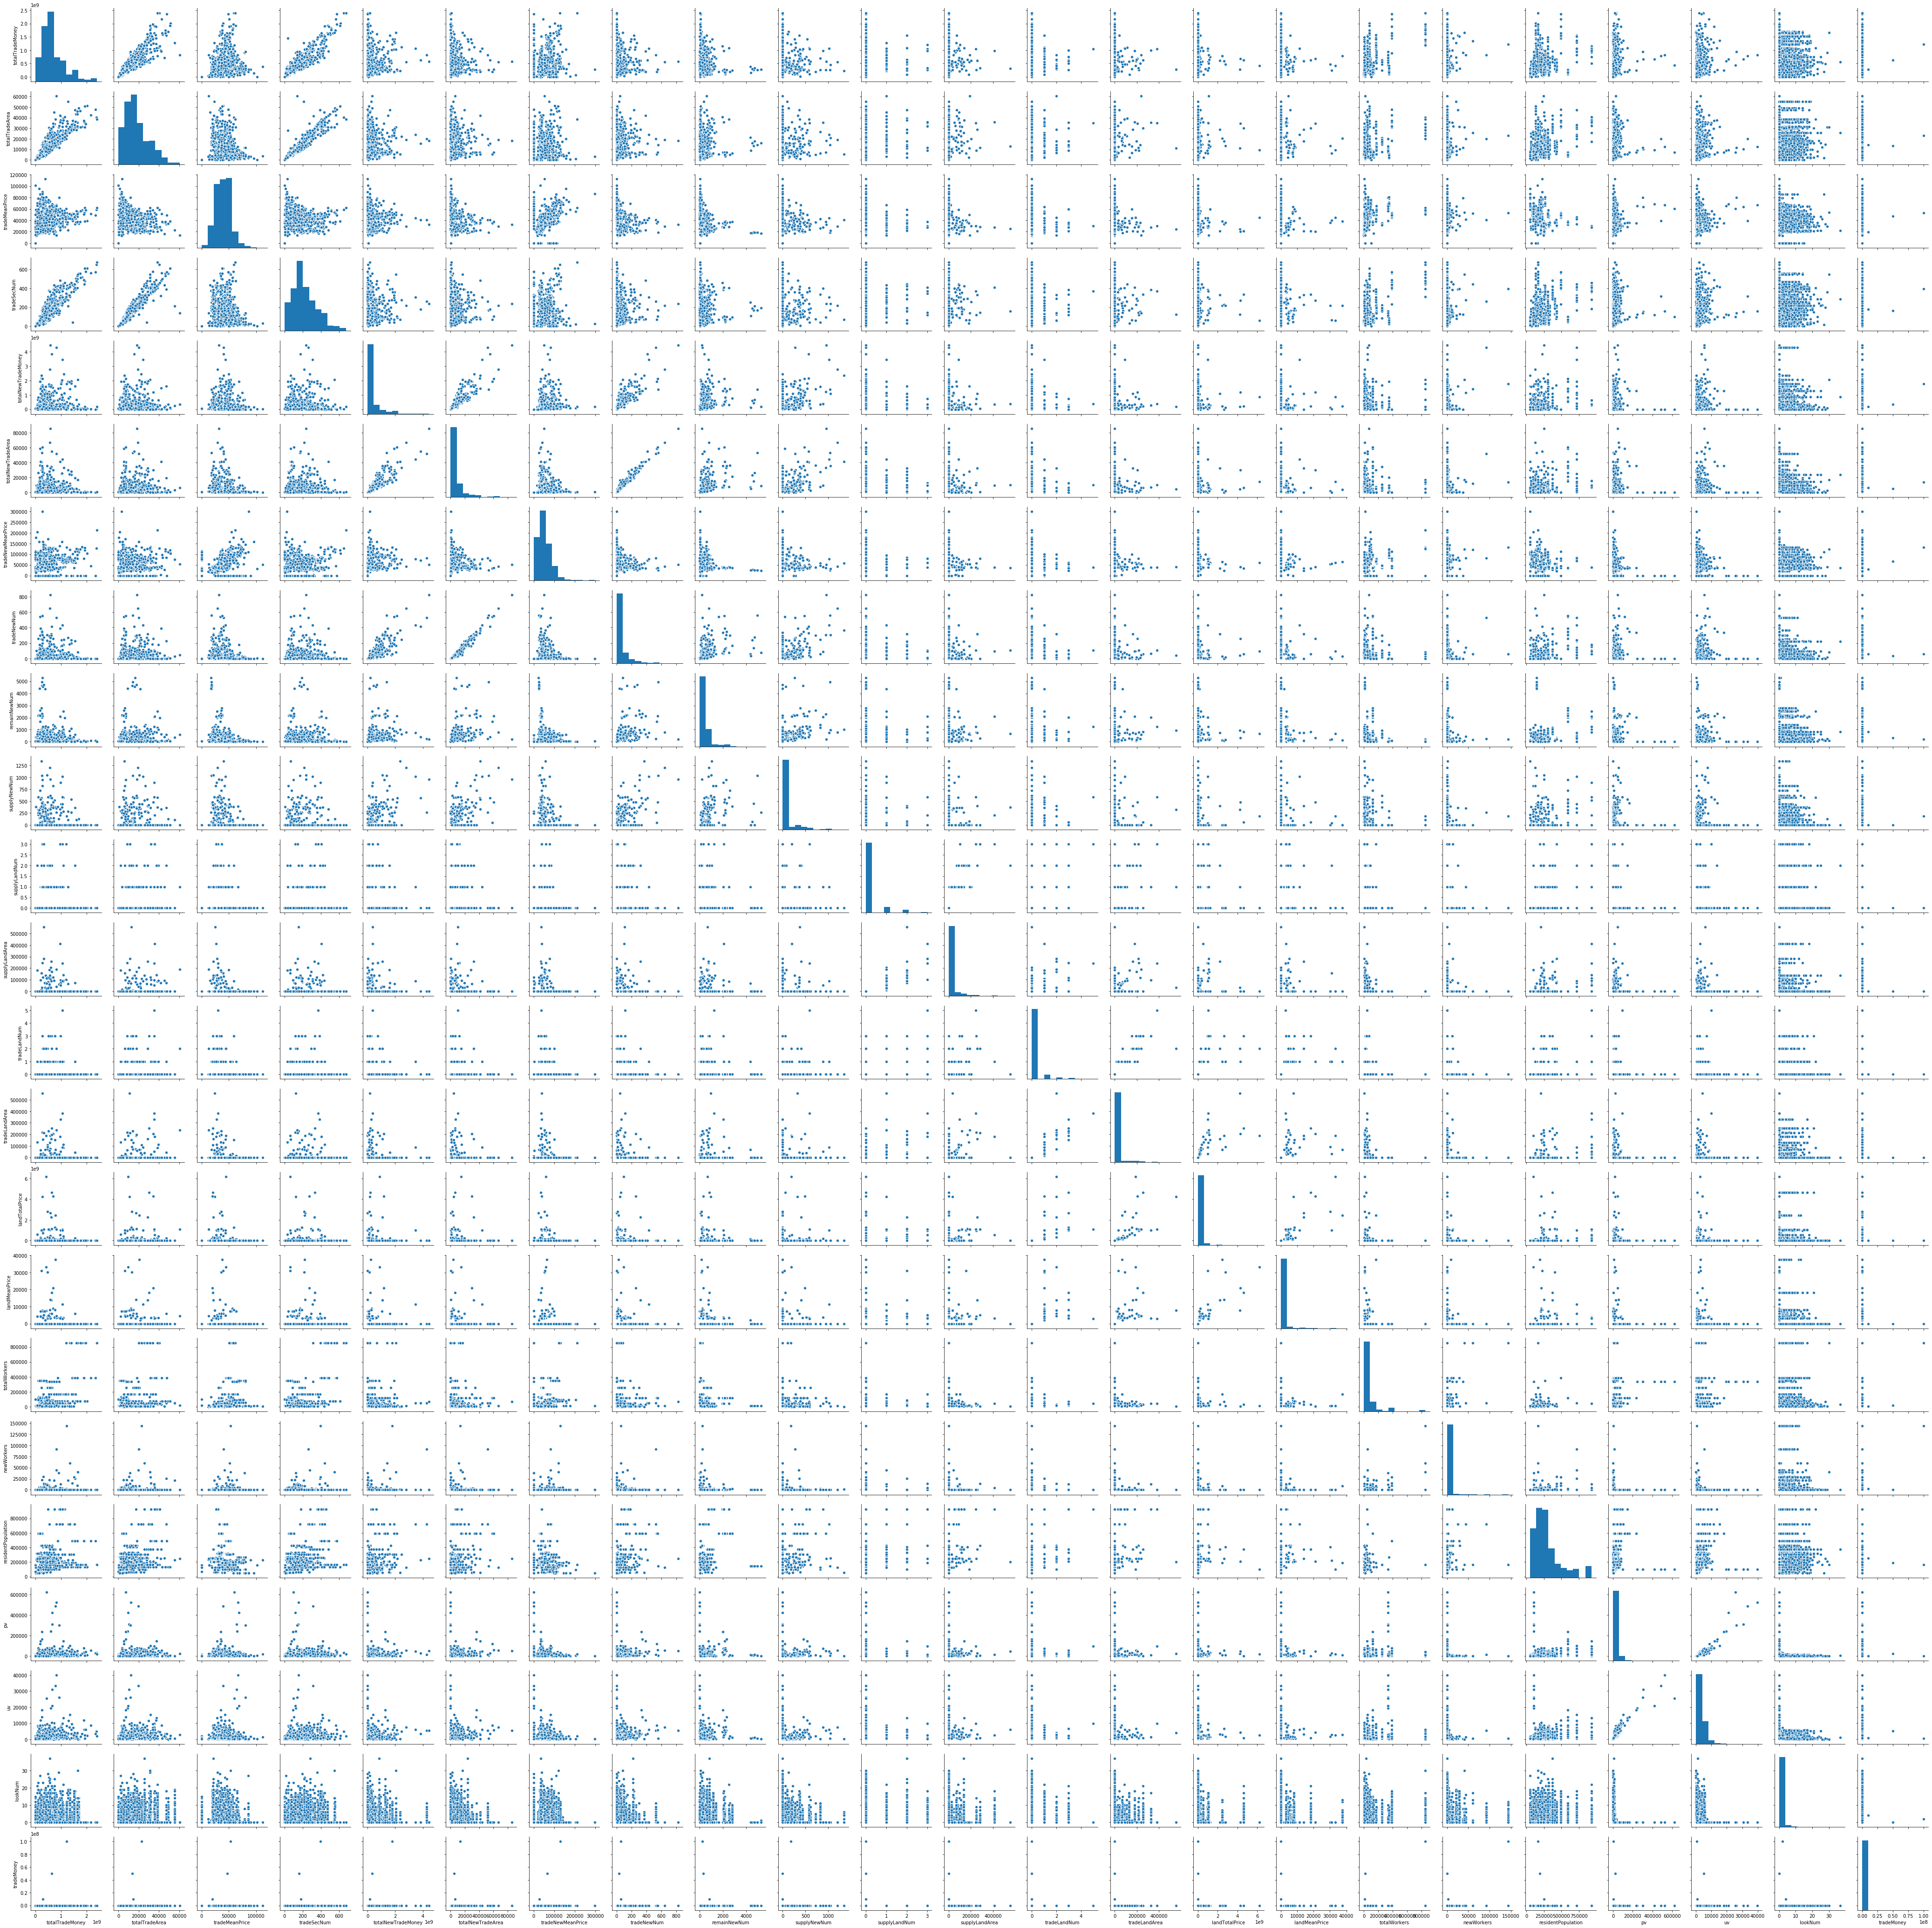

In [25]:
sns.pairplot(data_train4)